<a href="https://colab.research.google.com/github/ryonce/Daily-Projects/blob/main/Regression_Metrics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics Exercise - Core 1


In [2]:
# Imports

import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')

In [3]:
# Load in data

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ1pGRsk-u_3WjEuQN-cQ2ssrhnwODJHazPV625VaGFrncqEWxt-0hrWNguWRvBPFws4FVtovwFMSmq/pub?output=csv')

df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


<AxesSubplot:>

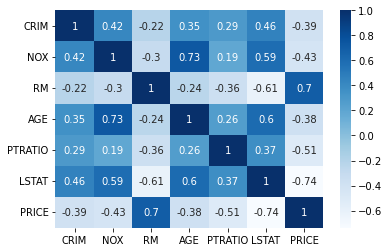

In [4]:
# Make a heatmap of the correlations. 
# Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. 
# Limit your analysis to these three features.

corr = df.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Blues', annot = True)

# RM, LSAT and PTRATIO are the highest correlations

In [5]:
# Select ONLY the 3 features most highly correlated with price for your feature matrix (X)

X = df[['RM', 'LSTAT', 'PTRATIO']]

# Select price for your target vector (y)

y = df['PRICE']

In [6]:
#  Split your data into train and test sets. Please use the random number 42 for consistency!

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
# Instantiate your model and fit it on the training set

scaler = StandardScaler()
linreg = LinearRegression()

preprocessor = make_pipeline(scaler, linreg)
preprocessor

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [8]:
# Fit the model pipeline on the training data

preprocessor.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
# Predictions

train_pred = preprocessor.predict(X_train)
test_pred = preprocessor.predict(X_test)

In [10]:
# Evaluate your model performance using R^2 on the training set and on the test set. 
# Is there a difference between model performance on the training data vs the test data?

# Calculating R2

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train R-Squared: {round((train_r2), 3)}")
print(f"Test R-Squared: {round((test_r2), 3)}")

# Slight difference at .055

Train R-Squared: 0.688
Test R-Squared: 0.633


In [11]:
# Evaluate your model on both data sets using mean absolute error (MAE)

train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)

print(f"Train R-Squared: {round((train_MAE), 3)}")
print(f"Train R-Squared: {round((test_MAE), 3)}")

Train R-Squared: 3.714
Train R-Squared: 3.392


In [12]:
# Evaluate your model on both data sets using mean squared error (MSE).

train_MAE = mean_squared_error(y_train, train_pred)
test_MAE = mean_squared_error(y_test, test_pred)

print(f"Train R-Squared: {round((train_MAE), 3)}")
print(f"Train R-Squared: {round((test_MAE), 3)}")

Train R-Squared: 27.687
Train R-Squared: 25.689


In [13]:
# Evaluate your model performance using RMSE on the training set and on the test set. 
# This metric is useful because the units will be in the same units as your target vector, in this case, 1,000s of dollars.

train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)** 2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)** 2))

print(f"Train R-Squared: {round((train_RMSE), 3)}")
print(f"Train R-Squared: {round((test_RMSE), 3)}")

Train R-Squared: 5.262
Train R-Squared: 5.068


# Ensemble Tree Exercise - Core 2


## Decision Tree Model

In [56]:
# Import

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Create an instance of the model

dec_tree = DecisionTreeRegressor(random_state = 42)

# Fit the data

dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
# Evaluate the model

def evluate_regression(reg,X_train,X_test,y_train,y_test):
    """Uses model.score to display the R^2 values for training and test splits"""
    print(f"Training R^2: {reg.score(X_train,y_train):.3f}")
    print(f"Test R^2: {reg.score(X_test,y_test):.3f}")

evluate_regression(dec_tree,X_train, X_test,y_train,y_test)

Training R^2: 1.000
Test R^2: 0.458


In [72]:
# What was the depth of our default tree?

dec_tree.get_depth()

20

In [73]:
# List of values to try for max_depth:

depths = list(range(2, 20)) # will try every value between 2 and 20

# Data frame to store the score for each value of max_depth:

scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])

for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

In [74]:
# Turn list of scores into a dataframe to sort

sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.720032,0.921483
5,0.692269,0.891318
4,0.68715,0.856741
7,0.657457,0.945706
3,0.641014,0.807697


In [75]:
# Get final scores for best model for decision tree using R^2

best_model = DecisionTreeRegressor(max_depth = 6,random_state =42)
best_model.fit(X_train,y_train)

evluate_regression(best_model, X_train,X_test,y_train, y_test)

Training R^2: 0.921
Test R^2: 0.720


 - a max_depth = 6 produced the best model with Decision Tree with R^2
    - Training R^2: 0.921
    - Test R^2: 0.720

In [64]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics for a model
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  # Train
  mae = mean_absolute_error(y_train, pipe.predict(x_train))
  mse = mean_squared_error(y_train, pipe.predict(x_train))
  rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(x_train)))
  r2 = r2_score(y_train, pipe.predict(x_train))
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  # Test
  mae = mean_absolute_error(y_test, pipe.predict(x_test))
  mse = mean_squared_error(y_test, pipe.predict(x_test))
  rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
  r2 = r2_score(y_test, pipe.predict(x_test))

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [76]:
# Create an instance of the model

best_model = DecisionTreeRegressor(max_depth = 6,random_state =42)

# Fit the model

best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [77]:
# Display model performance metrics using a function

model_metrics(best_model, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Decision Tree Model')

Decision Tree Model Train Scores
MAE: 1.7548 
MSE: 6.9630 
RMSE: 2.6388 
R2: 0.9215

Decision Tree Model Test Scores
MAE: 2.8155 
MSE: 19.6053 
RMSE: 4.4278 
R2: 0.7200



- Here are the scores of each metric using the best model of 6 max depth

## Bagged Tree Model

In [78]:
# Create an instance of the model

bag_tree = BaggingRegressor(random_state = 42)

# Fit the data

bag_tree.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [79]:
# Evaluate the model

evluate_regression(bag_tree,X_train, X_test,y_train,y_test)

Training R^2: 0.957
Test R^2: 0.672


In [90]:
# What were the n_estimators of our default tree?

bag_tree.get_params()

# 10

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [91]:
# List of estimator values

estimators = [10, 20, 30, 40, 50, 100]

# Data frame to store the scores

scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])

# Iterate through the values to find the best number of estimators

for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   train_score = bag_reg.score(X_train, y_train)
   test_score = bag_reg.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score

In [92]:
# Turn list of scores into a dataframe to sort

sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Train Score,Test Score
40,0.969834,0.720751
100,0.973266,0.718568
50,0.970541,0.717904
30,0.967693,0.717179
20,0.9664,0.704722


In [95]:
# Get final scores for best model for Bagged tree using R^2

bt_best_model = BaggingRegressor(n_estimators = 40,random_state =42)
bt_best_model.fit(X_train,y_train)

evluate_regression(bt_best_model, X_train,X_test,y_train, y_test)

Training R^2: 0.970
Test R^2: 0.721


 - a n_estimators = 40 produced the best model with Bagged Tree with R^2
    - Training R^2: 0.970
    - Test R^2: 0.721

In [98]:
# Display model performance metrics using a function

model_metrics(bt_best_model, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Bagged Tree Model')

Bagged Tree Model Train Scores
MAE: 1.0840 
MSE: 2.6752 
RMSE: 1.6356 
R2: 0.9698

Bagged Tree Model Test Scores
MAE: 2.7940 
MSE: 19.5550 
RMSE: 4.4221 
R2: 0.7208



- Here are the scores of each metric using the best model of 40 n_estimators


## Random Forests Model

In [99]:
# Create an instance of the model

rf = RandomForestRegressor(random_state = 42)

# Fit the model

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [100]:
# Evaluate the model

evluate_regression(rf,X_train, X_test,y_train,y_test)

Training R^2: 0.974
Test R^2: 0.715


In [104]:
# What was the depth of our default random forest?

est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

22

In [105]:
# List of values to try for max_depth:

depths = range(1, max(est_depths)) # will try every value between 1 and 22

# Data frame to store the score for each value of max_depth:

scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

In [106]:
# Turn list of scores into a dataframe to sort

sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.746192,0.912229
6,0.744052,0.933110
4,0.743572,0.887797
7,0.738664,0.948442
3,0.737034,0.844603


In [107]:
# Get final scores for best model for Bagged tree using R^2

rf_best_model = RandomForestRegressor(max_depth = 5,random_state =42)
rf_best_model.fit(X_train,y_train)

evluate_regression(rf_best_model, X_train,X_test,y_train, y_test)

Training R^2: 0.914
Test R^2: 0.749


 - a max_depth = 5 produced the best model with Decision Tree with R^2
    - Training R^2: 0.914
    - Test R^2: 0.749

In [108]:
# Display model performance metrics using a function

model_metrics(rf_best_model, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Random Forest Model')

Random Forest Model Train Scores
MAE: 2.0084 
MSE: 7.6112 
RMSE: 2.7588 
R2: 0.9142

Random Forest Model Test Scores
MAE: 2.6161 
MSE: 17.5489 
RMSE: 4.1891 
R2: 0.7494



- Here are the scores of each metric using the best model depth of 5

# Evaluate your best model using multiple regression metrics.

In [109]:
model_metrics(rf_best_model, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Random Forest Model')

model_metrics(bt_best_model, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Bagged Tree Model')

model_metrics(best_model, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Decision Tree Model')

Random Forest Model Train Scores
MAE: 2.0084 
MSE: 7.6112 
RMSE: 2.7588 
R2: 0.9142

Random Forest Model Test Scores
MAE: 2.6161 
MSE: 17.5489 
RMSE: 4.1891 
R2: 0.7494

Bagged Tree Model Train Scores
MAE: 1.0840 
MSE: 2.6752 
RMSE: 1.6356 
R2: 0.9698

Bagged Tree Model Test Scores
MAE: 2.7940 
MSE: 19.5550 
RMSE: 4.4221 
R2: 0.7208

Decision Tree Model Train Scores
MAE: 1.7548 
MSE: 6.9630 
RMSE: 2.6388 
R2: 0.9215

Decision Tree Model Test Scores
MAE: 2.8155 
MSE: 19.6053 
RMSE: 4.4278 
R2: 0.7200



- The best model would be the Random Forest Model. 

  - The Random Forest Model would help show the future price data by using RM, LSTAT and PTRATIO columns. The future prices using MSE could be predicted to a avarage of 2,616 dollars from price. 
  - The model also shows RMSE is at 4,189 dollars meaning the model is consistently near the MSE.